# Exercises Week 9: Temperature regulated gene expression

**Course**: [Topics in life sciences engineering](https://moodle.epfl.ch/enrol/index.php?id=17061) (BIO-411)

**Professors**:  _Gönczy Pierre_, _Naef Felix_, _McCabe Brian Donal_

SSV, MA, 2022-2023


This week's exercises are inspired by the work of [Gotic et al., 2015](http://genesdev.cshlp.org/content/30/17/2005), in which RNA (pre-mRNA and mRNA) levels were measured in mouse NIH-3T3 fibroblasts after cells were switched from a warm to a colder temperature (38C to 33C), and vice-versa (33C to 38C). The experiments were conducted over multiple time points in an *approach to steady-state* design. 
The cold-inducible *Cirbp* gene was used as an example to examine the kinetics and mechanisms of post-transcritional control of gene expression. 

## Setup the Jupyter environment 
In order to run this notebook, we advise you to use the EPFL's JupyterLab centralized platform [noto.epfl.ch](http://noto.epfl.ch). Some of the required libraries are not available on the platform but you can install them copy-pasting the following commands in the **Jupyter Terminal** (open a new tab with the '+' icon and select "Terminal"):

````
my_venvs_create Week9_env
my_venvs_activate Week9_env
pip install gseapy
pip install adjustText
my_kernels_create Week9_env “Week9”
my_venvs_deactivate
````
Refresh your browser's page and select the "Week9" kernel using the top right toggle button.

## Exercise 0: Questions on the paper "Temperature regulates splicing efficiency of the cold-inducible RNA-binding protein gene *Cirbp*"
While carefully reading the paper :

0. Which is the physiological situation that is presented in the introduction?
1. Describe in general known mechanisms behind cold- and heat-inducible genes. 
2. Which experiments allowed the authors to confirm the post-transcriptional regulation of *Cirbp* mRNA accumulation?
3. For *Cirbp*, how did they distinguish between regulation at the degradation and splicing levels?
4. Explain the choice to include the parameter $\alpha$ (the percentage of splicing-prone *Cirbp* pre-mRNA) in the kinetic model. 
5. How did they obtain genome-wide transcription and mRNA accumulation levels to characterize cold and heat-induced genes?
6. Summarize the comparison with the mouse liver experiments. 

Hint: make sure to identify the figure panels that support your answers.

## Exercise 1: Simulation of a simplified production-decay ODE model of transcription

We first describe a system in which a (nuclear) pre-mRNA is transcribed and spliced to produce an mRNA. Both species undergo different degradation processes. We can write a 2D ODE:

\begin{eqnarray*}
&&\frac{dP}{dt} = s - (k_p + \rho)P \\
&&\frac{dM}{dt} = \rho P - k_m M \\
\end{eqnarray*}

Here, $P$ and $M$ denote, respectively, the concentrations of pre-mRNA and mRNA.  $s$ is the transcription rate, which is here constant $s$, but it can also a time-dependent function (more to come in exercise session Week 11).
$k_m$ and $k_p$ are, respectively, the degration rates of $M$ and $P$ that were set as constant. $\rho$ is the splicing rate of pre-mRNA $P$ to mRNA $M$, and is also taken as a constant.

When all parameters are constant, after a transient period, the concentrations reach steady-state levels:

<--
\begin{eqnarray*}
&&P = \frac{s}{(k_p + \rho)} \\
&&M = \frac{s}{k_m}\frac{\rho}{(k_p + \rho)} \\
\end{eqnarray*}
-->

### Question 1
1. Derive the steady state concentrations. Interpret what happens to $M$ when $\rho\gg k_p$.
2. Compute the steady-state ratio mRNA/pre-mRNA. Comment the results, in particular, which parameters matter and which don't. Discuss how this quantity might be used to compare mRNA half-life between different conditions. 
3. Find in litterature realistic values of $\rho$, $s$, and $k_m$ in typical mammalian cells (e.g. NIH-3T3 fibroblasts).
4. Estimate the ratio of mRNA/pre-mRNA molecules in a typical mammalian cells?

### Answer 1

1. *Type your answers here*
2. *Type your answers here*
3. *Type your answers here*
4. *Type your answers here*

### Question 2 
Use the code below to simulate the production-decay ODE for a constant $s$. 
1. Vary the parameter space by using the widget below. Also explore different initial conditions.
2. Add a feature (few code lines) that also shows on the plots the steady state that you computed above.
3. Optional: Implement a third equation describing the protein level and add it to the simulation and plots.

### Answer 2
1. *Type your answer here*  
2. *Type your answer here*  
3. *Type your answer here*  

In [62]:
## Import libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import gseapy as gp

from scipy.integrate import odeint
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed
from adjustText import adjust_text


In [64]:
## function definition
def func(y, t, s, kp, km, rho):
    P, M=y
    return [s - (kp + rho)*P, rho*P - km*M] 


def simulation(func, par, x0 = None, t = None):
    s=par['s']
    kp=par['kp']
    km=par['km']
    rho=par['rho']

    P_ss = s/(kp + rho) #Add your steady-state solution here 
    M_ss = (s/km)*(rho/(kp + rho)) #Add you steady-state solution here
    
    xx=odeint(func, x0, t, args=(s, kp, km, rho))
    plt.figure(1)
    plt.ylim([0,150])
    plt.axhline(y=P_ss, color='r', linestyle='--') # uncomment after adding your steady-state solution 
    plt.axhline(y=M_ss, color='r', linestyle='--') # uncomment after adding your steady-state solution
    plt.plot(t, xx[:,0],label = 'P(t)')
    plt.plot(t, xx[:,1],label = 'M(t)')
    plt.xlabel("time [min]")
    plt.ylabel("Concenration")
    plt.legend()
    plt.show()
    
def animate(x0, time, s=5, kp= 0.05, km=0.05, rho=0.4):
    #define the function domain
    par={'s':s,'kp':kp, 'km':km, 'rho':rho}
    simulation(func, par, x0, time)

#initial conditions
z0=[0,120] #[P, M]
t = np.linspace(0,100,1001)
interact(animate, x0=fixed(z0), time=fixed(t), 
         s = (1,10,0.01), #unit is concentration [P] per min
         kp = (1/120,1/10,1/1000), #kp^1 in [10 min, 120 min] 
         km = (1/600,1/10,1/1000), #km^1 in [10 min, 600 min]
         rho = (1/30,1,0.1)); #rho^1 in [1 min, 30 min]



interactive(children=(FloatSlider(value=5.0, description='s', max=10.0, min=1.0, step=0.01), FloatSlider(value…

## Exercise 2: RNA-seq analysis and modelling of gene expression response to temperature up- and down- shifts

In [Gotic et al., 2015](http://genesdev.cshlp.org/content/30/17/2005), cells were harvested at 0, 1, 3, 6 and 9 hours after a temperature switch from 33C to 38C and vice-versa, in duplicates. RNA-seq libraries were prepared and sequenced. The resulting RNA-seq data were processed and reads were assigned to pre-mRNA and mRNA species. 

In [65]:
### These functions will be used below ###
### Optional: study them in details [will not be examined]

## Subselect samples of the full data based on feature, condition, replicate and time
def subselect(data, feature, replicate, time, condition):
    f1 = data.columns.get_level_values('feature').isin(feature)
    f2 = data.columns.get_level_values('condition').isin(condition)
    f3 = data.columns.get_level_values('replicate').isin(replicate)
    f4 = data.columns.get_level_values('time').isin(time)
    dat_sub= data.iloc[:,f1 & f2 & f3 & f4]
    
    return dat_sub

## Plot PCA for a data.frame and display color/shape according to the input parameter
def run_PCA(data, nc=5, x_1=1, x_2=2, col='replicate', shape='time', scale_d=True, log=True):
    pca = PCA(n_components=nc)
    x_1=x_1-1
    x_2=x_2-1
    if(scale_d):
        data_2 = scale(data)
    else:
        data_2 = data
        
    if(log):
        data_2 =  np.log2(data_2 + 1)
        
    pca.fit(data_2.T)

    labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
    }

    
    ## compute PCA and plot
    pca_transformed = pca.transform(data_2.T)
    fig = px.scatter(pca_transformed, x=x_1, y=x_2, 
                     color=data.columns.get_level_values(col), 
                     symbol=dat_sub.columns.get_level_values(shape),
                     width=600, height=600)
   
    fig.update_traces(marker={'size': 13})
    fig.update_layout(plot_bgcolor = 'rgb(243,243,243)', xaxis_title=labels[str(x_1)],
                      yaxis_title=labels[str(x_2)])
    fig.show()
    
    df_pca= pd.DataFrame(pca.components_, columns=data.index, index = ['PC-1','PC-2','PC-3','PC-4','PC-5'])

    return df_pca

## Plot Gene profile across all conditions
def plot_gene(data, gene , xx_33_38=None, xx_38_33=None, t_2=None):
    #subselect
    time= ['0', '1' ,'3' ,'6', '9']
    replicate = ['2', '13', '11', '5']
    dat_1= subselect(data, ['intron'], replicate, time, ['33to38'])
    dat_2= subselect(data, ['exon'], replicate, time, ['33to38'])
    dat_3= subselect(data, ['intron'], replicate, time, ['38to33'])
    dat_4= subselect(data, ['exon'], replicate, time, ['38to33'])
    #plot
    t=np.array([0,0,1,1,3,3,6,6,9,9])
    fig, axs = plt.subplots(2,2,figsize=(8,8), sharex=True)
    
    axs[0,0].plot(t, dat_1[dat_1.index.str.endswith(gene)].values.T, 'o', color = 'lightblue', label='intron 33to38')
    axs[0,0].set_title("intron 33to38")
    
    axs[1,0].plot(t, dat_2[dat_2.index.str.endswith(gene)].values.T, 'o', color = 'lightblue', label='exon 33to38')
    axs[1,0].set_title("exons 33to38")
    
    axs[0,1].plot(t, dat_3[dat_3.index.str.endswith(gene)].values.T, 'o', color = 'lightblue', label='intron 38to33')
    axs[0,1].set_title("intron 38to33")

    axs[1,1].plot(t, dat_4[dat_4.index.str.endswith(gene)].values.T, 'o', color = 'lightblue', label='exon 38to33')
    axs[1,1].set_title("exon 38to33")

    if xx_33_38 is not None:
        axs[0,0].plot(t_2, xx_33_38[:,0],label = 'P(t)')
        axs[1,0].plot(t_2, xx_33_38[:,1])
        axs[0,1].plot(t_2, xx_38_33[:,0])
        axs[1,1].plot(t_2, xx_38_33[:,1])
    
        
    for ax in axs.flat:
        ax.set(xlabel='Time [h]', ylabel='RPKM')
    fig.suptitle(gene, fontsize=16)

###  Question 0
1. Pratically, how would identify whether reads are coming from the pre-mRNA or mRNA? What are the possible caveats?

### Answer 0
1. *Type your answer here*

###  Question 1
Using the provided code, explore the RNA-Seq data: 
1. Perform principal component analysis (PCA) selecting different temperature conditions, time points, replicates and features (intron vs. exon). For each case described below, explore the principal components (PCs) and comment. *Hint: Modify only the code marked as 'PCA cell' and 'enrichR' below*.
  
    a. Select all the samples and describe the main sources of variance in the data. Is there an outlier sample? Are the replicates clustered as you expect?  
    b. Select only exonic counts and describe which PC correlates with time?  
    c. Select only exonic counts and one condition (38to33 or 33to38). What can you say about the transcriptome response in function of time? Do you find a difference between the two conditions?  


2. Using the relevant sample combinations and principal components, extract the gene PCA loadings (positive or/and negative) and perform gene enrichment analysis using *enrichR* (GEA, code provided below) to identify biological functions or regulatory mechanisms behind heat- or cold-induced gene responses. For the GEA, select different databases from *enrichR*. For example 'GO_Biological_Process_2021', 'GO_Molecular_Function_2021', 'WikiPathways_2019_Mouse' for gene functions, or 'ChEA 2022' for transcription factor enrichment analysis.  
  
    a. Using these tools, find gene functions regulated by the temperature.  
    b. Do you find differences between cold-induced versus heat-induced genes in terms of biological functions, or involved transcription factors?  
    c. What are the main sources of variance between the two replicates? How do you interpret this?  
    d. Optional: Using variants of this approach, how would you design the analysis to specifically identify post-transcriptional regulation?  

### Answer 1

1. *Type your answers here*  
a.   
b.  
c.  
d.  

2. *Type your answers here*  
a.   
b.  
c.  
d. 

**The cells below contain the code for Question 1.**

In [36]:
#Load the RNA-seq data (normalized counts) downloaded from the GEO database

dat_33_38 = pd.read_csv("./GoticData/GSE85553_33-38_exon_intron_RPKM.txt",sep='\t')
dat_33_38=dat_33_38.add_prefix("33to38.")

dat_38_33 = pd.read_csv("./GoticData/GSE85553_38-33_exon_intron_RPKM.txt",sep='\t')
dat_38_33=dat_38_33.add_prefix("38to33.")

dat_all = pd.concat([dat_33_38, dat_38_33.iloc[:, :20]],axis=1)
dat_all.columns=dat_all.columns.str.replace('\.t','.', regex=True)
dat_all.replace([np.inf, -np.inf], 0, inplace=True)

dat_all.columns=dat_all.columns.str.split('.', expand = True)
dat_all.columns.names = ['condition','time','replicate','feature']
print(dat_all.shape)
dat_all.head()

(38087, 40)


condition                  33to38                                          \
time                            0                             1             
replicate                      13              2             13             
feature                      exon    intron exon    intron exon    intron   
ENSMUSG00000090025|Gm16088    0.0  0.000000  0.0  0.000000  0.0  0.000000   
ENSMUSG00000064842|U6         0.0  0.000000  0.0  0.000000  0.0  0.000000   
ENSMUSG00000051951|Xkr4       0.0  1.972758  0.0  7.955391  0.0  3.763305   
ENSMUSG00000089699|Gm1992     0.0  0.000000  0.0  0.980092  0.0  0.000000   
ENSMUSG00000088390|U7         0.0  0.000000  0.0  0.000000  0.0  0.000000   

condition                                                ... 38to33            \
time                                         3           ...      3             
replicate                     2             13           ...      5             
feature                    exon    intron exon   intron  ...   exon    intron   
ENSMUSG00000090025|Gm16088  0.0  0.000000  0.0  0.00000  ...    0.0  0.000000   
ENSMUSG00000064842|U6       0.0  0.000000  0.0  0.00000  ...    0.0  0.000000   
ENSMUSG00000051951|Xkr4     0.0  1.941199  0.0  3.90031  ...    0.0  4.871782   
ENSMUSG00000089699|Gm1992   0.0  0.000000  0.0  0.00000  ...    0.0  0.000000   
ENSMUSG00000088390|U7       0.0  0.000000  0.0  0.00000  ...    0.0  0.000000   

condition                                                                     \
time                          6                             9                  
replicate                    11              5             11              5   
feature                    exon    intron exon    intron exon    intron exon   
ENSMUSG00000090025|Gm16088  0.0  0.000000  0.0  0.000000  0.0  0.000000  0.0   
ENSMUSG00000064842|U6       0.0  0.000000  0.0  0.000000  0.0  0.000000  0.0   
ENSMUSG00000051951|Xkr4     0.0  3.863257  0.0  4.953918  0.0  2.945545  0.0   
ENSMUSG00000089699|Gm1992   0.0  0.000000  0.0  1.000000  0.0  0.000000  0.0   
ENSMUSG00000088390|U7       0.0  0.000000  0.0  0.000000  0.0  0.000000  0.0   

condition                             
time                                  
replicate                             
feature                       intron  
ENSMUSG00000090025|Gm16088  0.000000  
ENSMUSG00000064842|U6       0.000000  
ENSMUSG00000051951|Xkr4     1.963427  
ENSMUSG00000089699|Gm1992   0.568750  
ENSMUSG00000088390|U7       0.000000  

[5 rows x 40 columns]

In [37]:
# Remove lowly expressed genes.
time= ['0', '1' ,'3' ,'6', '9']
replicate = ['2', '13', '11', '5']
conditions = ['33to38','38to33']

dat_intron= subselect(dat_all, ['intron'], replicate, time, conditions)
dat_exon= subselect(dat_all, ['exon'], replicate, time, conditions)
dat_all = dat_all.loc[(dat_intron.mean(axis=1) > 1 ) & (dat_exon.mean(axis=1) > 10), :]
print(dat_all.shape)


(11553, 40)


**PCA cell**

In [67]:
#Perform PCA selecting different temperature conditions, timepoints, replicate and features (intron vs. exon). 

#Change those parameters to selection different samples for the PCA
condition = ['38to33','33to38'] #,'38to33'
time= ['0', '1' ,'3' ,'6', '9']
replicate = ['2', '13', '11', '5'] # 13 and 2 are from the 33to38 experiment, 5 and 11 from the 38to33
feature = ['exon']

#Subselect the samples 
dat_sub = subselect(dat_all, feature, replicate, time, condition)

#Perform the PCA, change the color and shape parameters for better interpreation of the results
pca = run_PCA(dat_sub, x_1=1, x_2=2, col='time', shape='condition', scale_d=True, log=True)
run_PCA(dat_sub, x_1=1, x_2=2, col='replicate', shape='feature', scale_d=True, log=True)

run_PCA(dat_sub, x_1=2, x_2=3, col='time', shape='condition', scale_d=True, log=True)
run_PCA(dat_sub, x_1=2, x_2=3, col='replicate', shape='feature', scale_d=True, log=True)

run_PCA(dat_sub, x_1=3, x_2=4, col='time', shape='condition', scale_d=True, log=True)
run_PCA(dat_sub, x_1=3, x_2=4, col='replicate', shape='feature', scale_d=True, log=True)



,ENSMUSG00000033845|Mrpl15,ENSMUSG00000025903|Lypla1,ENSMUSG00000033813|Tcea1,ENSMUSG00000002459|Rgs20,ENSMUSG00000033793|Atp6v1h,ENSMUSG00000025907|Rb1cc1,ENSMUSG00000090031|4732440D04Rik,ENSMUSG00000051285|Pcmtd1,ENSMUSG00000025909|Sntg1,ENSMUSG00000079671|2610203C22Rik,...,ENSMUSG00000079317|Trappc2,ENSMUSG00000079316|Rab9,ENSMUSG00000051224|Tceanc,ENSMUSG00000049775|Tmsb4x,ENSMUSG00000025742|Prps2,ENSMUSG00000031358|Msl3,ENSMUSG00000031352|Hccs,ENSMUSG00000087159|Gm15246,ENSMUSG00000035299|Mid1,ENSMUSG00000096768|ERDR1
PC-1,-0.013220,0.003040,-0.007554,0.002117,-0.007159,-0.001034,0.003856,0.006077,0.000396,0.004458,...,0.003280,0.004222,0.003827,-0.024516,-0.009663,-0.000334,0.001385,0.004044,0.003521,0.002515
PC-2,0.001535,0.000330,-0.002268,-0.001376,-0.006498,0.001667,-0.002865,-0.002204,-0.006761,-0.003126,...,-0.003173,-0.001513,-0.004559,-0.018652,-0.005009,0.007442,0.004866,-0.002862,-0.001254,-0.002134
PC-3,0.007891,-0.003141,-0.005904,-0.004728,0.003270,0.007812,-0.001955,-0.006228,-0.004763,-0.002407,...,-0.001389,0.000930,-0.003864,-0.003465,0.004382,0.003428,-0.000021,-0.002496,-0.003004,-0.003243
PC-4,-0.005294,0.007624,0.008328,-0.005242,0.018695,0.023119,-0.003614,0.006771,-0.000185,-0.001507,...,-0.001879,0.012868,-0.002849,0.026309,0.005568,-0.008410,-0.006697,-0.003677,-0.005090,-0.004287
PC-5,-0.001760,0.006111,0.000800,0.000530,-0.002836,0.004253,0.004927,0.004683,0.002404,0.004133,...,0.005593,0.002683,0.006638,-0.023054,0.001368,0.001451,0.006092,0.005198,0.003436,0.003957


**enrichR cells**

In [68]:
##  Using the genes loadings on the different PCs, perform gene enrichment analysis with the provided code (explore different databases from *enrichR*)

#List the available databases for gene enrichment analysis

mouse = gp.get_library_name(organism='Mouse')
print(mouse[1:20])

['ARCHS4_IDG_Coexp', 'ARCHS4_Kinases_Coexp', 'ARCHS4_TFs_Coexp', 'ARCHS4_Tissues', 'Achilles_fitness_decrease', 'Achilles_fitness_increase', 'Aging_Perturbations_from_GEO_down', 'Aging_Perturbations_from_GEO_up', 'Allen_Brain_Atlas_10x_scRNA_2021', 'Allen_Brain_Atlas_down', 'Allen_Brain_Atlas_up', 'Azimuth_Cell_Types_2021', 'BioCarta_2013', 'BioCarta_2015', 'BioCarta_2016', 'BioPlanet_2019', 'BioPlex_2017', 'CCLE_Proteomics_2020', 'CORUM']


In [49]:
#Perform gene set enrichment analysis using the top 100 genes on PC-1 with the 'GO_Biological_Process_2021' database
#You can gene the enrichR database and the number of selected genes
gene_sets = 'GO_Biological_Process_2021'
nb_genes = 100
PC='PC-2'

top = pca.sort_values(by=PC,axis=1).columns[:nb_genes]
bottom = pca.sort_values(by=PC,axis=1).columns[-nb_genes:]
top_bot = top#.union(bottom) # you can use onlyy top or bottom here as well
gene_list = top_bot.str.split("|").str[1].to_series().str.upper()
gene_list = gene_list.squeeze().str.strip().to_list()
enr = gp.enrichr(gene_list=gene_list,
                 gene_sets=gene_sets,
                 organism='mouse', 
                 outdir=None, 
                )
enr.results.head(10)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2021,mitotic spindle organization (GO:0007052),15/157,1.914360e-15,1.297707e-12,0,0,24.554267,832.129203,PLK1;BUB1B;KIF23;KIF11;DYNLL1;RANGAP1;CKAP5;AU...
1,GO_Biological_Process_2021,microtubule cytoskeleton organization involved...,14/128,2.592821e-15,1.297707e-12,0,0,28.254182,948.945796,PLK1;BUB1B;KIF11;DYNLL1;RANGAP1;CKAP5;AURKA;CD...
2,GO_Biological_Process_2021,regulation of mitotic cell cycle phase transit...,14/188,5.631281e-13,1.878971e-10,0,0,18.455226,520.534614,HSP90AA1;UBE2C;PLK1;BUB1B;HMMR;DYNLL1;CKAP5;AU...
3,GO_Biological_Process_2021,regulation of cell cycle G2/M phase transition...,10/85,1.413834e-11,3.538120e-09,0,0,29.370370,733.734436,TPX2;HSP90AA1;CENPF;PLK1;HMMR;DYNLL1;GTSE1;CKA...
4,GO_Biological_Process_2021,response to unfolded protein (GO:0006986),8/49,1.118605e-10,2.239448e-08,0,0,42.118770,965.099729,DNAJA1;DNAJB1;HSPA8;HSP90AA1;HSP90AB1;HSPH1;HS...
5,GO_Biological_Process_2021,mitotic sister chromatid segregation (GO:0000070),9/102,2.111237e-09,3.522248e-07,0,0,21.063807,420.770435,CENPE;KIF18B;ESPL1;SPAG5;PRC1;PLK1;NUSAP1;KIF2...
6,GO_Biological_Process_2021,mitotic nuclear division (GO:0140014),8/74,3.374591e-09,4.745712e-07,0,0,26.131752,509.751873,TPX2;KIF18B;ESPL1;SPAG5;UBE2C;PLK1;NUSAP1;KIF11
7,GO_Biological_Process_2021,regulation of G2/M transition of mitotic cell ...,10/149,3.792777e-09,4.745712e-07,0,0,15.796163,306.290245,TPX2;HSP90AA1;CENPF;CCND1;PLK1;HMMR;DYNLL1;CKA...
8,GO_Biological_Process_2021,regulation of cellular response to heat (GO:19...,8/79,5.723049e-09,6.365303e-07,0,0,24.285364,460.906201,DNAJB1;HSPA8;HSP90AA1;HSP90AB1;HSPH1;CHORDC1;F...
9,GO_Biological_Process_2021,mitotic cell cycle phase transition (GO:0044772),11/209,7.835354e-09,7.843189e-07,0,0,12.298377,229.544532,CCNA2;HSP90AA1;CCND1;UBE2C;CCNF;PLK1;CCNG1;DYN...


### Question 3
In this exercise, we will identify genes regulated by temperature in a more direct approach than the PCA.

1. Using the *plot_DE* (DE for differential expression) function, identify genes differentially expressed between 33C and 38C with similar or opposite behavior than *Cirbp* (cold-inducible vs. heat-inducible genes)
2. Perform gene enrichment analysis for the identified genes.
3. Using the *plot_DE* function, identified genes regulated **post-transcriptionally** by the temperature.

### Answer 3

1. *Type you answer here*    
2. *Type you answer here*   
3. *Type you answer here*   


In [50]:
# Function to plot genes differentially expressed between x_2/x_1 and y_2/y2

def plot_DE(dat_all, c_x1, c_x2, c_y1, c_y2, t_x1, t_x2, t_y1, t_y2, f_x1, f_x2, f_y1, f_y2, FC=2, xlab="", ylab=""):
    
    replicate = ['2', '13', '11', '5']

    dat_x1=subselect(dat_all, f_x1, replicate, t_x1, c_x1).mean(axis=1)
    dat_x2=subselect(dat_all, f_x2, replicate, t_x2, c_x2).mean(axis=1)

    dat_y1=subselect(dat_all, f_y1, replicate, t_y1, c_y1).mean(axis=1)
    dat_y2=subselect(dat_all, f_y2, replicate, t_y2, c_y2).mean(axis=1)

    x=np.log2(1 + dat_x2)- np.log2(1 + dat_x1)
    y=np.log2(1 + dat_y2) - np.log2(1 + dat_y1)

    pos_heat_induced =(x > FC) & (y > FC)
    pos_cold_induced =(x < -FC) & (y < -FC)
    x_2 = x[pos_cold_induced]
    y_2 = y[pos_cold_induced]
    fig, ax = plt.subplots(figsize=(10,10))

    ax.plot(x,y, 'o', color = 'lightblue', markersize=2)
    ax.axhline(y=0, color='b')
    ax.axvline(x=0, color='b')
    ax.set_xlim(-8,8)
    ax.set_ylim(-8,8)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    texts = [ax.text(x_2[k], y_2[k], v.split("|")[1]) for k, v in enumerate(dat_all.index[pos_cold_induced])]
    adjust_text(texts)
    return(pos_cold_induced)


**Explore with this function**

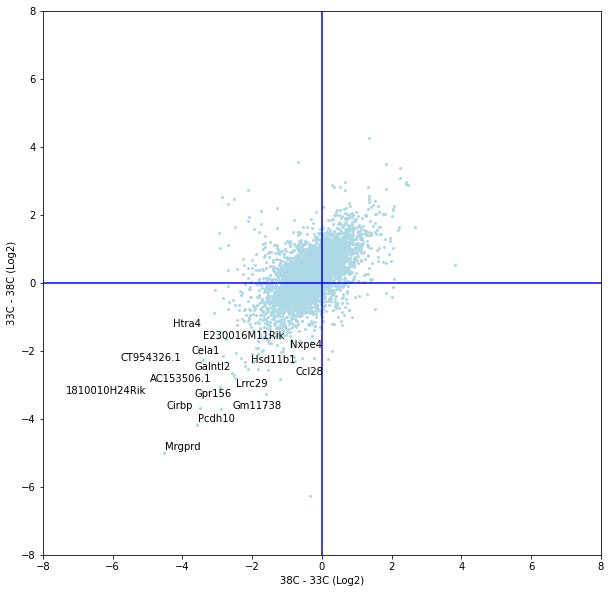

In [51]:
#Use the plot_DE function with the different conditions and features to identify genes regulated by the temperature
DE_genes = plot_DE(dat_all, ['33to38'],['33to38'],['38to33'],['38to33'],
                           ['0'],['9'],['9'],['0'],
                           ['exon'],['exon'],['exon'],['exon'],
                           2, 
                           '38C - 33C (Log2)', '33C - 38C (Log2)')

**enrichR analysis**

In [ ]:
#Perform gene enrichment analysis on the DE genes
gene_sets='GO_Biological_Process_2021'
gene_list = dat_all.index[DE_genes].str.split("|").str[1].to_series().str.upper()
gene_list = gene_list.squeeze().str.strip().to_list()
enr = gp.enrichr(gene_list=gene_list,
                 gene_sets=gene_sets,
                 organism='mouse', 
                 outdir=None, 
                )
enr.results.head(10)

### Question 4

1. Using the *plot_gene* function, show the temporal dynamic of genes identified as having temperature-dependent regulation of gene expression in *Question 3*.
2. What can you say in terms of transcriptional versus post-transcriptional regulation?
3. Compare with the profile of *Cirbp*.

### Answer 4

1. *Type you answer here*    
2. *Type you answer here*   
3. *Type you answer here*  

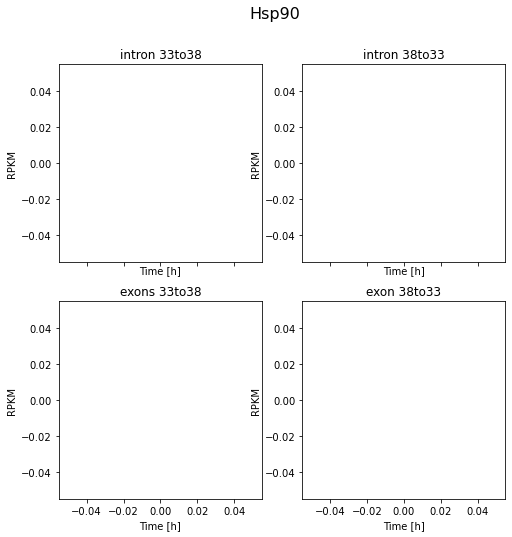

In [72]:
plot_gene(dat_all,'Hsp90') # Write gene name with only the first letter as uppercase

### Question 5

1. Using the code below, simulate the ODE using different parameters for the two temperatures. 
2. Find the parameters that fit *Cirbp* gene expression profile. Comment on your result.
3. *Optional*: replace *Cirbp* with other genes identified above. You might want to change the parameter and ylim scales.

*Note: To simplify, we here used a model without the $\alpha$, which is still good enough to fit most gene profiles. The caveat is that with this simplified mode, the obtained parameters are not fully realistic, which is the argument the authors used to favor the model with the $\alpha$.*

### Answer 5

1. *Type you answer here*    
2. *Type you answer here*   


In [73]:
###### Simulate 2 conditions ########

def compute_ss_param(s, kp, km, rho):
    P_ss = s / (kp + rho)
    M_ss = (rho / km) * (s / kp + rho)
    return [P_ss, M_ss]
   
## function definition
def func(y, t, s, kp, km, rho):
    P, M=y
    return [s - (kp + rho)*P, rho*P - km*M] 

def simulation(func, par, z0 = None, t = None):
    s=par['s']
    kp=par['kp']
    km=par['km']
    rho=par['rho']

    xx=odeint(func, z0, t, args=(s, kp, km, rho))
    
    return(xx)

def animate(time, s_33=5560, s_38=5560, km_33=0.151, km_38=0.466, kp= 20.794, rho_33=1.9, rho_38=0.34, gene='ENSMUSG00000045193|Cirbp'):
    
    #33 to 38
    x0 = compute_ss_param(s_33, kp, km_33, rho_33)
    par={'s':s_38,'km':km_38, 'kp':kp, 'rho':rho_38}
    xx_33_38 = simulation(func, par, x0, time)
    
    #38 to 33
    x0 = compute_ss_param(s_38, kp, km_38, rho_38)
    print(x0)

    par={'s':s_33,'km':km_33, 'kp':kp, 'rho':rho_33}
    xx_38_33 = simulation(func, par, x0, time)
    
   
    plot_gene(dat_all, gene, xx_33_38, xx_38_33, time)    

In [74]:
t = np.linspace(0,9,9*3600);
interact(animate, time=fixed(t), gene = 'Cirbp',
         s_33 = (500,10000,1),
         s_38 = (500,10000,1),
         km_33 = (0.05,1,0.05),
         km_38 = (0.05,1,0.05),
         kp = (0.05,24,0.1),  
         rho_33 = (0.05,5,0.1),
         rho_38 = (0.05,5,0.1));

interactive(children=(IntSlider(value=5560, description='s_33', max=10000, min=500), IntSlider(value=5560, des…